In [ ]:
# Import necessary libraries
import gdown
import pandas as pd

# Download the Parquet file from Google Drive
!gdown 1fKHCknq7oNI1UbrthxZX0FP5P8bzUlxE -O esc50_features_extracted.parquet

# Load the Parquet file into a Pandas DataFrame
features_df = pd.read_parquet("esc50_features_extracted.parquet")

print("Parquet file loaded successfully!")
print(f"Shape of the dataset: {features_df.shape}")
features_df.head()


Downloading...
From: https://drive.google.com/uc?id=1fKHCknq7oNI1UbrthxZX0FP5P8bzUlxE
To: /content/esc50_features_extracted.parquet
100% 540k/540k [00:00<00:00, 10.8MB/s]
Parquet file loaded successfully!
Shape of the dataset: (2000, 35)


,zcr_mean,zcr_std,spectral_centroid_mean,spectral_centroid_std,spectral_bandwidth_mean,spectral_bandwidth_std,category,filename,fold,mfcc_mean_0,...,mfcc_std_3,mfcc_std_4,mfcc_std_5,mfcc_std_6,mfcc_std_7,mfcc_std_8,mfcc_std_9,mfcc_std_10,mfcc_std_11,mfcc_std_12
0,0.007329,0.027503,273.927703,1168.622069,255.475244,976.942865,dog,1-100032-A-0.wav,1,-581.739929,...,15.894979,12.837584,2.839211,9.407924,1.725599,2.647743,2.202942,4.135943,1.731832,1.732612
1,0.157994,0.022784,4042.281204,536.421310,2643.109696,172.288741,chirping_birds,1-100038-A-14.wav,1,-254.936310,...,13.717227,9.443714,11.233823,10.637623,10.935958,7.955853,8.934217,10.558152,7.269026,6.993200
2,0.199469,0.029614,4410.555928,391.361066,4051.643196,162.486199,vacuum_cleaner,1-100210-A-36.wav,1,-30.461212,...,4.879633,5.098261,4.306431,4.915914,4.160092,5.192626,6.609114,4.546207,4.543290,4.966105
3,0.202079,0.021309,4370.451735,223.974376,3949.239193,115.658679,vacuum_cleaner,1-100210-B-36.wav,1,-31.114239,...,5.528185,4.816660,4.880049,4.512170,5.154856,6.175560,5.149764,5.571711,4.659288,6.084853
4,0.027574,0.010662,2075.738865,585.039587,3455.603120,501.156250,thunderstorm,1-101296-A-19.wav,1,-466.622101,...,6.995115,7.750019,7.584086,6.499315,5.029333,4.783904,4.213262,4.849271,4.231527,4.358825


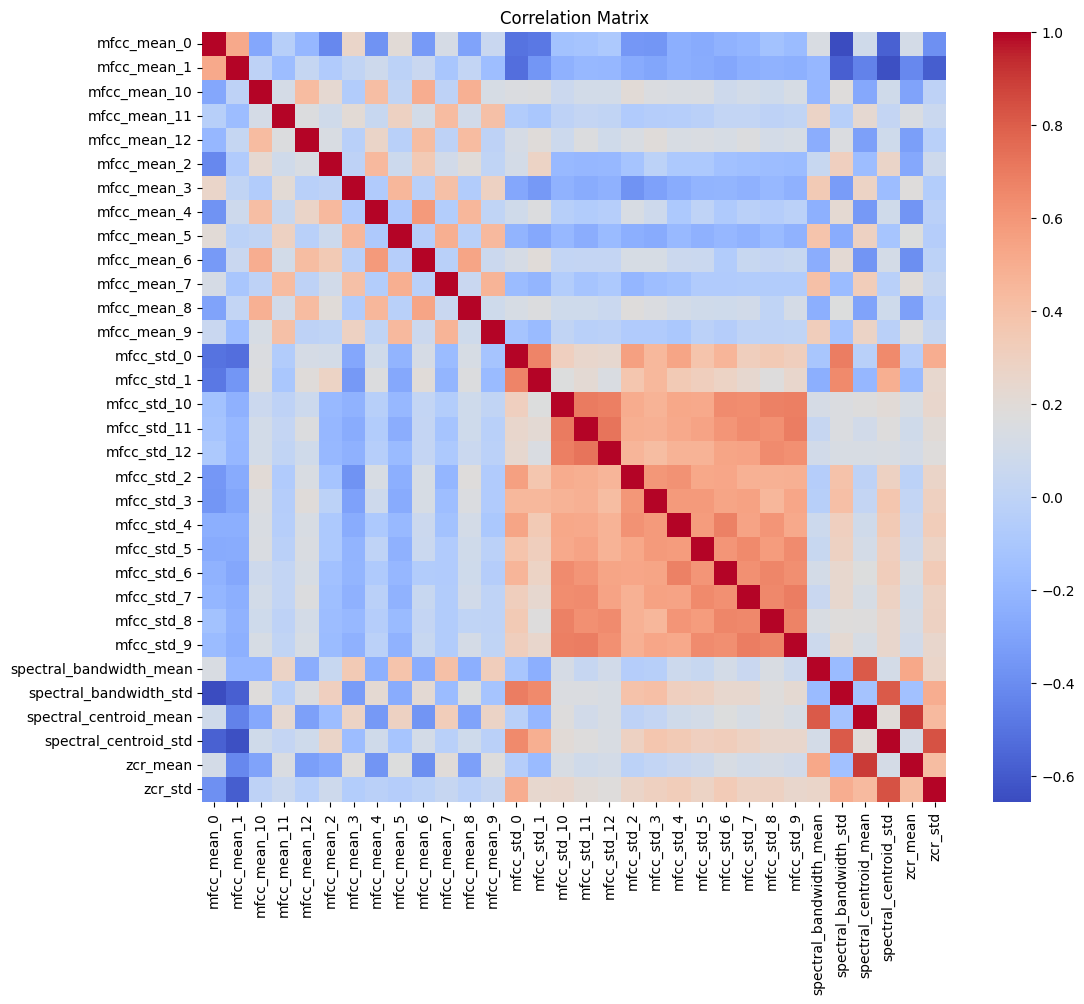

Highly correlated feature pairs (threshold = 0.8): [('spectral_bandwidth_mean', 'spectral_centroid_mean'), ('spectral_bandwidth_std', 'spectral_centroid_std'), ('spectral_centroid_mean', 'spectral_bandwidth_mean'), ('spectral_centroid_mean', 'zcr_mean'), ('spectral_centroid_std', 'spectral_bandwidth_std'), ('spectral_centroid_std', 'zcr_std'), ('zcr_mean', 'spectral_centroid_mean'), ('zcr_std', 'spectral_centroid_std')]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_columns = features_df.select_dtypes(include=['float64', 'int64']).columns.difference(['fold', 'category'])

# Calculate correlation matrix
correlation_matrix = features_df[numeric_columns].corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Identify highly correlated features
threshold = 0.8  # Correlation threshold
high_corr_pairs = [
    (col1, col2) for col1 in correlation_matrix.columns for col2 in correlation_matrix.columns
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]
print(f"Highly correlated feature pairs (threshold = {threshold}): {high_corr_pairs}")


### Feature Selection Based on Correlation Analysis

We identified several pairs of features with a correlation greater than 0.8. Highly correlated features may introduce redundancy and do not always provide additional useful information for classification. Based on the analysis:

1. **`spectral_bandwidth_mean` vs `spectral_centroid_mean`:**
   - Decision: Retained `spectral_centroid_mean` and removed `spectral_bandwidth_mean`.
   - Reason: `spectral_centroid_mean` is more interpretable and widely used in audio analysis.

2. **`spectral_bandwidth_std` vs `spectral_centroid_std`:**
   - Decision: Retained `spectral_centroid_std` and removed `spectral_bandwidth_std`.
   - Reason: `spectral_centroid_std` is more interpretable for understanding spectral variability.

3. **`spectral_centroid_mean` vs `zcr_mean`:**
   - Decision: Retained both features.
   - Reason: While correlated, these features capture complementary information: `spectral_centroid_mean` represents the frequency content, while `zcr_mean` helps identify percussive or noisy sounds.

4. **`spectral_centroid_std` vs `zcr_std`:**
   - Decision: Retained both features.
   - Reason: Similar to the means, these features provide complementary insights into spectral variability and signal noisiness.

By removing `spectral_bandwidth_mean` and `spectral_bandwidth_std`, we reduce redundancy without losing essential information, streamlining the feature set for model training.


In [ ]:
# List of features to drop
features_to_drop = ['spectral_bandwidth_mean', 'spectral_bandwidth_std']

# Drop the selected features from the DataFrame
features_df = features_df.drop(columns=features_to_drop)

print(f"Feature set updated. New shape of the dataset: {features_df.shape}")


Feature set updated. New shape of the dataset: (2000, 33)


In [ ]:
features_df.columns

Index(['zcr_mean', 'zcr_std', 'spectral_centroid_mean',
       'spectral_centroid_std', 'category', 'filename', 'fold', 'mfcc_mean_0',
       'mfcc_mean_1', 'mfcc_mean_2', 'mfcc_mean_3', 'mfcc_mean_4',
       'mfcc_mean_5', 'mfcc_mean_6', 'mfcc_mean_7', 'mfcc_mean_8',
       'mfcc_mean_9', 'mfcc_mean_10', 'mfcc_mean_11', 'mfcc_mean_12',
       'mfcc_std_0', 'mfcc_std_1', 'mfcc_std_2', 'mfcc_std_3', 'mfcc_std_4',
       'mfcc_std_5', 'mfcc_std_6', 'mfcc_std_7', 'mfcc_std_8', 'mfcc_std_9',
       'mfcc_std_10', 'mfcc_std_11', 'mfcc_std_12'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.model_selection import PredefinedSplit

# Define PredefinedSplit for cross-validation
fold_indices = features_df['fold'].values - 1  # Adjust fold indices to 0-based indexing
ps = PredefinedSplit(test_fold=fold_indices)

print(f"Number of folds: {len(np.unique(fold_indices))}")


Number of folds: 5


In [ ]:
# Identify numeric columns to be used as features
numeric_columns = features_df.select_dtypes(include=['float64', 'int64']).columns.difference(['fold'])

# Features (X)
X = features_df[numeric_columns]

# Target (y)
y = features_df['category']

print(f"Feature set shape: {X.shape}")
print(f"Target set shape: {y.shape}")


Feature set shape: (2000, 30)
Target set shape: (2000,)


## pipeline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.preprocessing import StandardScaler

import numpy as np

# Define Logistic Regression pipeline
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('model', LogisticRegression(random_state=42, multi_class='multinomial', solver='lbfgs'))  # Logistic Regression
])

# Define hyperparameter distributions
lr_param_distributions = {
    'model__C': loguniform(1e-3, 1e3),  # Regularization: 0.001 to 1000 (log scale)
    'model__penalty': ['l2'],          # Regularization penalty
    'model__solver': ['lbfgs', 'saga'] # Solvers
}
# Set up RandomizedSearchCV
lr_search = RandomizedSearchCV(
    estimator=lr_pipeline,
    param_distributions=lr_param_distributions,
    n_iter=50,         # Number of random samples
    cv=ps,              # Cross-validation folds
    scoring='accuracy', # Scoring metric
    random_state=42,
    verbose=2,         # Show progress
    n_jobs=-1          # Parallelize search
)

# Train Logistic Regression with RandomizedSearchCV
print("Starting training...")
lr_search.fit(X, y)
print("Training completed!")

# Best parameters and best score
print(f"Best Parameters: {lr_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {lr_search.best_score_:.4f}")

# Evaluate the best model
best_lr_model = lr_search.best_estimator_



Starting training...
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training completed!
Best Parameters: {'model__C': 1.408146893930582, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best Cross-Validation Accuracy: 0.4515


In [ ]:
from sklearn.model_selection import cross_val_predict

# Generate cross-validated predictions
y_pred = cross_val_predict(best_lr_model, X, y, cv=ps)  # ps è il PredefinedSplit

# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Classification Report:
                  precision    recall  f1-score   support

        airplane       0.49      0.47      0.48        40
       breathing       0.31      0.25      0.28        40
  brushing_teeth       0.71      0.62      0.67        40
     can_opening       0.60      0.68      0.64        40
        car_horn       0.27      0.28      0.27        40
             cat       0.30      0.33      0.31        40
        chainsaw       0.30      0.33      0.31        40
  chirping_birds       0.70      0.65      0.68        40
    church_bells       0.42      0.55      0.48        40
        clapping       0.40      0.50      0.44        40
     clock_alarm       0.52      0.55      0.54        40
      clock_tick       0.21      0.23      0.22        40
        coughing       0.53      0.57      0.55        40
             cow       0.32      0.33      0.32        40
  crackling_fire       0.59      0.68      0.63        40
        crickets       0.51      0.53      0.52 

In [ ]:
from joblib import dump

# Save the entire RandomizedSearchCV object
dump(lr_search, 'logistic_regression_search.joblib')
print("RandomizedSearchCV object saved!")


RandomizedSearchCV object saved!


In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform

# Define SVM pipeline
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('model', SVC(random_state=42))  # Support Vector Machine
])

# Define hyperparameter distributions
svm_param_distributions = {
    'model__C': loguniform(1e-3, 1e3),        # Regularization: 0.001 to 1000 (log scale)
    'model__gamma': loguniform(1e-4, 1e1),   # Kernel coefficient: 0.0001 to 10 (log scale)
    'model__kernel': ['linear', 'rbf']       # Kernel options
}

# Set up RandomizedSearchCV
svm_search = RandomizedSearchCV(
    estimator=svm_pipeline,
    param_distributions=svm_param_distributions,
    n_iter=50,         # Number of random samples
    cv=ps,              # Cross-validation folds
    scoring='accuracy', # Scoring metric
    random_state=42,
    verbose=2,         # Show progress
    n_jobs=-1          # Parallelize search
)

# Train SVM with RandomizedSearchCV
print("Starting training...")
svm_search.fit(X, y)
print("Training completed!")

# Best parameters and best score
print(f"Best Parameters: {svm_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {svm_search.best_score_:.4f}")

# Evaluate the best model
best_svm_model = svm_search.best_estimator_


Starting training...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training completed!
Best Parameters: {'model__C': 0.1767016940294795, 'model__gamma': 5.669849511478847, 'model__kernel': 'linear'}
Best Cross-Validation Accuracy: 0.4630


In [ ]:
from joblib import dump

# Save the entire RandomizedSearchCV object
dump(svm_search, 'svm_search_results.joblib')
print("RandomizedSearchCV object for SVM saved!")


RandomizedSearchCV object for SVM saved!


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform

# Define Random Forest pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization (optional for Random Forest)
    ('model', RandomForestClassifier(random_state=42))  # Random Forest
])

# Define hyperparameter distributions
rf_param_distributions = {
    'model__n_estimators': randint(50, 300),       # Number of trees: 50 to 300
    'model__max_depth': randint(5, 50),           # Maximum depth: 5 to 50
    'model__max_features': uniform(0.1, 0.9),     # Fraction of features: 10% to 90%
    'model__min_samples_split': randint(2, 20),   # Minimum samples per split: 2 to 20
    'model__min_samples_leaf': randint(1, 10)     # Minimum samples per leaf: 1 to 10
}

# Set up RandomizedSearchCV
rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_distributions,
    n_iter=50,         # Number of random samples
    cv=ps,              # Cross-validation folds
    scoring='accuracy', # Scoring metric
    random_state=42,
    verbose=2,         # Show progress
    n_jobs=-1          # Parallelize search
)

# Train Random Forest with RandomizedSearchCV
print("Starting training...")
rf_search.fit(X, y)
print("Training completed!")

# Best parameters and best score
print(f"Best Parameters: {rf_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {rf_search.best_score_:.4f}")

# Extract the best model
best_rf_model = rf_search.best_estimator_


Starting training...
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Training completed!
Best Parameters: {'model__max_depth': 19, 'model__max_features': 0.19980173873064822, 'model__min_samples_leaf': 3, 'model__min_samples_split': 8, 'model__n_estimators': 290}
Best Cross-Validation Accuracy: 0.4460


In [ ]:
from joblib import dump

# Save the entire RandomizedSearchCV object
dump(rf_search, 'rf_search_results.joblib')
print("RandomizedSearchCV object for Random Forest saved!")


RandomizedSearchCV object for Random Forest saved!
